**CS420 - Assignment 2**

#### Your goal
Change minimax.py file so that the results of this notebook look approximately like matchup-results-100.png.

*See readme.md for more information.*

In [19]:
NAME = 'Narayan Khanal'

In [20]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [21]:
import pandas as pd
from collections import defaultdict
from datetime import datetime as dt

from tttlib import *
from players import randomBot,oneBot
from minimax import minimaxBot

def getDateTime():
    return dt.now().strftime("%Y-%m-%d %H:%M:%S")

print('Ready.')
print(getDateTime())

Ready.
2024-09-03 21:12:56


In [22]:
GAMES = 100

matchups = ['Random (X) v Random (O)',
            'OneBot (X) v OneBot (O)',
            'Minimax (X) v Minimax (O)',

            'OneBot (X) v Random (O)',
            'Random (X) v OneBot (O)',
            
            'Minimax (X) v Random (O)',
            'Random (X) v Minimax (O)',

            'Minimax (X) v OneBot (O)',
            'OneBot (X) v Minimax (O)']

allResults = {'X wins':[],'O wins':[],'Draw':[]}

def matchupResults(playerX,playerO):
    matchupResults = defaultdict(int)
    for i in range(GAMES):
        result = play(playerX,playerO,printResult=False)
        matchupResults[ result ] += 1
    allResults['X wins'].append(matchupResults[X])
    allResults['O wins'].append(matchupResults[O])
    allResults['Draw'].append(matchupResults[None])

print('Running matchups...')

matchupResults(randomBot,randomBot)
print('...random v random matchups done.')
matchupResults(oneBot,oneBot)
print('...oneBot v oneBot matchups done.')
matchupResults(minimaxBot,minimaxBot)
print('...minimax v minimax matchups done.')

matchupResults(oneBot,randomBot)
matchupResults(randomBot,oneBot)
print('...oneBot v random matchups done.')

matchupResults(minimaxBot,randomBot)
matchupResults(randomBot,minimaxBot)
print('...minimax v random matchups done.')

matchupResults(minimaxBot,oneBot)
matchupResults(oneBot,minimaxBot)
print('All done.')
print(dt.now().strftime("%Y-%m-%d %H:%M:%S"))


df = pd.DataFrame(allResults, index=matchups)

df

Running matchups...
...random v random matchups done.
...oneBot v oneBot matchups done.
...minimax v minimax matchups done.
...oneBot v random matchups done.
...minimax v random matchups done.
All done.
2024-09-03 21:12:59


,X wins,O wins,Draw
Random (X) v Random (O),65,25,10
OneBot (X) v OneBot (O),39,22,39
Minimax (X) v Minimax (O),100,0,0
OneBot (X) v Random (O),85,4,11
Random (X) v OneBot (O),2,68,30
Minimax (X) v Random (O),77,17,6
Random (X) v Minimax (O),57,40,3
Minimax (X) v OneBot (O),0,84,16
OneBot (X) v Minimax (O),97,0,3


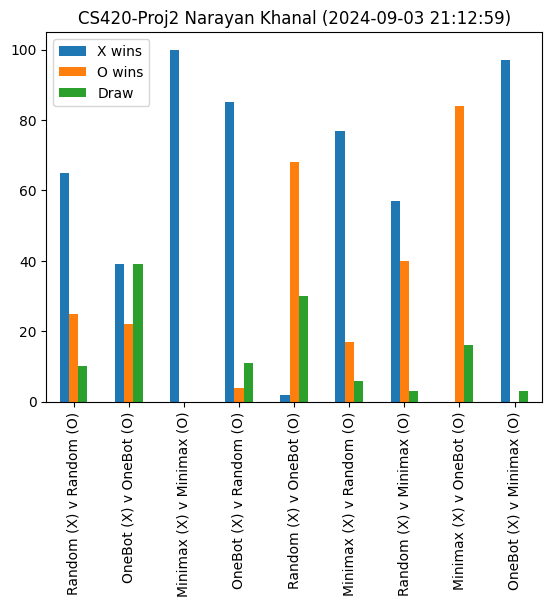

In [23]:
ax = df.plot.bar(title=f'CS420-Proj2 {NAME} ({getDateTime()})')